# easy_ViTPose demo
Be sure to enable GPU runtime

In [1]:
!git clone https://github.com/JunkyByte/easy_ViTPose.git
!cd easy_ViTPose/ && pip install -r requirements.txt && pip install -e .
!pip install huggingface_hub

Cloning into 'easy_ViTPose'...
remote: Enumerating objects: 937, done.
remote: Counting objects: 100% (270/270), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 937 (delta 248), reused 203 (delta 202), pack-reused 667 (from 1)
Receiving objects: 100% (937/937), 8.60 MiB | 6.49 MiB/s, done.
Resolving deltas: 100% (572/572), done.
  Using cached certifi-2023.7.22-py3-none-any.whl.metadata (2.2 kB)
  Using cached charset_normalizer-3.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (31 kB)
  Using cached coloredlogs-15.0.1-py2.py3-none-any.whl.metadata (12 kB)
  Using cached contourpy-1.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.9 kB)
  Using cached cycler-0.11.0-py3-none-any.whl.metadata (785 bytes)
  Using cached filelock-3.12.4-py3-none-any.whl.metadata (2.8 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached fonttools-4.43.0-cp310-cp310-manylinux_2_17_x86_64.manylinu

# Restart the runtime (runtime -> restart runtime) to update installed packages versions

# Download the models

In [2]:
#@title Choose model and run this cell

MODEL_SIZE = 'h'  #@param ['s', 'b', 'l', 'h']
YOLO_SIZE = 's'  #@param ['s', 'n']
DATASET = 'coco_25'  #@param ['coco_25', 'coco', 'wholebody', 'mpii', 'aic', 'ap10k', 'apt36k']
ext = '.pth'
ext_yolo = '.pt'

In [7]:
import os
from huggingface_hub import hf_hub_download
MODEL_TYPE = "torch"
YOLO_TYPE = "torch"
REPO_ID = 'JunkyByte/easy_ViTPose'
FILENAME = os.path.join(MODEL_TYPE, f'{DATASET}/vitpose-' + MODEL_SIZE + f'-{DATASET}') + ext
FILENAME_YOLO = 'yolov8/yolov8' + YOLO_SIZE + ext_yolo

print(f'Downloading model {REPO_ID}/{FILENAME}')
model_path = hf_hub_download(repo_id=REPO_ID, filename=FILENAME)
yolo_path = hf_hub_download(repo_id=REPO_ID, filename=FILENAME_YOLO)

In [3]:
model_path = "/home/salam/frontal_gait/vitpose-h-coco_25.pth"

In [4]:
yolo_path = "/home/salam/frontal_gait/yolov8s.pt"

# Run inference

In [ ]:
# cd easy_ViTPose

/content/easy_ViTPose/easy_ViTPose


In [5]:
# If you get an error from PIL restart environment and rerun this cell to update packages version
from easy_ViTPose.easy_ViTPose.inference import VitInference
model = VitInference(model_path, yolo_path, MODEL_SIZE,
                     dataset=DATASET, yolo_size=320, is_video=False)

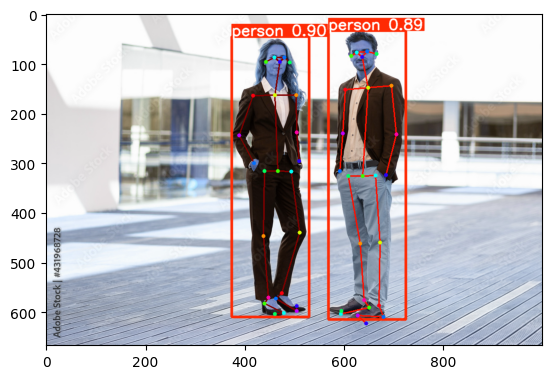

In [11]:
# Run inference on example image
import numpy as np
from io import BytesIO
from PIL import Image
from urllib.request import urlopen
from matplotlib import pyplot as plt

# Load image and run inference
# url = 'https://i.ibb.co/gVQpNqF/imggolf.jpg'
img = np.array(Image.open('/home/salam/frontal_gait/two_person'), dtype=np.uint8)

frame_keypoints = model.inference(img)
img = model.draw(show_yolo=True)

# from google.colab.patches import cv2_imshow
plt.imshow(img[..., ::-1])

In [12]:
print(frame_keypoints[0])

[[     96.784      471.88     0.96868]
 [     87.315      480.93     0.97585]
 [     87.147      460.65     0.97509]
 [     97.322      491.77     0.98025]
 [     96.015      443.21     0.97045]
 [     163.22      461.15      1.0009]
 [     163.33      504.41     0.98395]
 [     164.22      417.58     0.97182]
 [     238.54       505.1     0.96699]
 [     244.56       389.7      0.9727]
 [     296.66      510.31      0.9293]
 [     300.35      419.03     0.93728]
 [     317.06      494.69     0.83765]
 [     316.84      440.83      0.8505]
 [     316.05      467.22     0.87251]
 [     440.32      511.02     0.94514]
 [     447.87      438.87     0.91947]
 [     562.71      475.93     0.93414]
 [      571.2      448.32     0.93439]
 [     598.42      505.62     0.76562]
 [     588.95      505.35     0.87846]
 [      573.6      463.41     0.84803]
 [      602.7      479.85     0.81503]
 [     604.43      461.14     0.85032]
 [     583.11      440.58     0.84218]]


In [ ]:
import numpy as np

# frame_keypoints is generated from model.inference(img) in (y, x, confidence) format
# For example:
# frame_keypoints = {
#     5: (y_neck, x_neck, confidence_neck),  # Neck point
#     14: (y_hip, x_hip, confidence_hip)     # Hip point
# }

# Ensure frame_keypoints is defined by your model inference, for instance:
# frame_keypoints = model.inference(img)

# Extract (y, x) coordinates of the neck (index 5) and hip (index 14) points
frame_keypoints = frame_keypoints[0]
neck_point = np.array([frame_keypoints[5][1], frame_keypoints[5][0]])  # (x_neck, y_neck)
hip_point = np.array([frame_keypoints[14][1], frame_keypoints[14][0]])  # (x_hip, y_hip)

# Define a vertical line from the hip upwards (keeping x constant, y of neck)
vertical_line_point = np.array([hip_point[0], neck_point[1]])

# Calculate vectors for the lines from hip to neck and hip to vertical line
line_hip_to_neck = neck_point - hip_point
line_hip_to_vertical = vertical_line_point - hip_point

# Calculate the angle between the two lines using the dot product
dot_product = np.dot(line_hip_to_neck, line_hip_to_vertical)
magnitude_hip_to_neck = np.linalg.norm(line_hip_to_neck)
magnitude_hip_to_vertical = np.linalg.norm(line_hip_to_vertical)

cos_theta = dot_product / (magnitude_hip_to_neck * magnitude_hip_to_vertical)
angle_radians = np.arccos(np.clip(cos_theta, -1.0, 1.0))
angle_degrees = np.degrees(angle_radians)

print(f"The angle between the vertical line and the neck-hip line is {angle_degrees:.2f} degrees.")


The angle between the vertical line and the neck-hip line is 4.38 degrees.


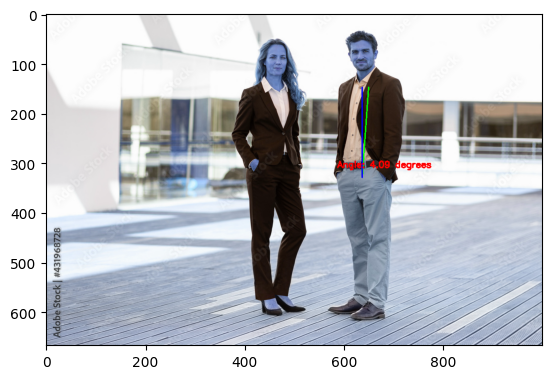

In [ ]:
import numpy as np
import cv2

# Load your image (if not already loaded from the previous steps)
# url = 'https://i.ibb.co/gVQpNqF/imggolf.jpg'
img = np.array(Image.open('two_person'), dtype=np.uint8)

# Run inference to get frame_keypoints in (y, x, confidence) format
frame_keypoints = model.inference(img)[1]

# Extract (y, x) coordinates of the neck and hip points
neck_point = (int(frame_keypoints[5][1]), int(frame_keypoints[5][0]))  # (x_neck, y_neck)
hip_point = (int(frame_keypoints[14][1]), int(frame_keypoints[14][0]))  # (x_hip, y_hip)

# Define a point vertically above the hip at the same x-coordinate as hip and y-coordinate of neck
vertical_line_point = (hip_point[0], neck_point[1])

# Draw the line from hip to neck
cv2.line(img, hip_point, neck_point, (0, 255, 0), 2)  # Green line for hip to neck

# Draw the vertical line from hip upwards
cv2.line(img, hip_point, vertical_line_point, (255, 0, 0), 2)  # Blue line for vertical line

# Calculate the angle (as previously)
line_hip_to_neck = np.array(neck_point) - np.array(hip_point)
line_hip_to_vertical = np.array(vertical_line_point) - np.array(hip_point)
dot_product = np.dot(line_hip_to_neck, line_hip_to_vertical)
magnitude_hip_to_neck = np.linalg.norm(line_hip_to_neck)
magnitude_hip_to_vertical = np.linalg.norm(line_hip_to_vertical)
cos_theta = dot_product / (magnitude_hip_to_neck * magnitude_hip_to_vertical)
angle_radians = np.arccos(np.clip(cos_theta, -1.0, 1.0))
angle_degrees = np.degrees(angle_radians)

# Annotate the image with the angle
angle_text = f"Angle: {angle_degrees:.2f} degrees"
cv2.putText(img, angle_text, (hip_point[0] - 50, hip_point[1] - 20),
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)  # Red text for angle

# Display the resulting image with lines and angle
# from google.colab.patches import cv2_imshow
plt.imshow(img[..., ::-1])  # Convert BGR to RGB for display in Colab


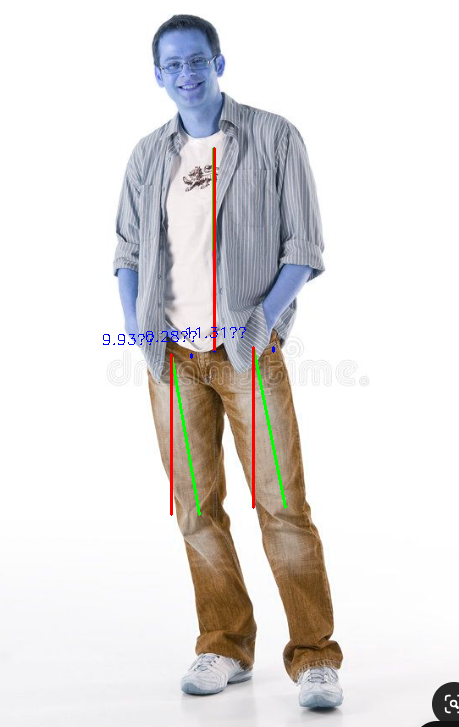

In [ ]:
import numpy as np
import cv2

# Specify the file path of your image
file_path = '/content/aaa.png'

# Load the image using OpenCV
img = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)

# Check if the image has 4 channels (e.g., RGBA) and convert to 3 channels if needed
if img.shape[2] == 4:
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)

#  Run inference to get frame_keypoints in (y, x, confidence) format
frame_keypoints = model.inference(img)[0]

# Extract coordinates for points
neck_point = (int(frame_keypoints[5][1]), int(frame_keypoints[5][0]))  # Neck point
hip_point = (int(frame_keypoints[14][1]), int(frame_keypoints[14][0]))  # Hip point (reference)
left_hip_point = (int(frame_keypoints[12][1]), int(frame_keypoints[12][0]))  # Left hip
right_hip_point = (int(frame_keypoints[13][1]), int(frame_keypoints[13][0]))  # Right hip
left_knee_point = (int(frame_keypoints[15][1]), int(frame_keypoints[15][0]))  # Left knee
right_knee_point = (int(frame_keypoints[16][1]), int(frame_keypoints[16][0]))  # Right knee

# Define vertical line points for neck and knees
vertical_line_neck_point = (hip_point[0], neck_point[1])  # Vertical point from hip towards neck
left_vertical_line_point = (left_hip_point[0], left_knee_point[1])  # Vertical point from left hip towards left knee
right_vertical_line_point = (right_hip_point[0], right_knee_point[1])  # Vertical point from right hip towards right knee

# Draw the lines: hip to neck, hips to knees, and vertical lines
cv2.line(img, hip_point, neck_point, (0, 255, 0), 2)  # Green line from hip to neck
cv2.line(img, left_hip_point, left_knee_point, (0, 255, 0), 2)  # Green line from left hip to left knee
cv2.line(img, right_hip_point, right_knee_point, (0, 255, 0), 2)  # Green line from right hip to right knee

# Draw vertical lines
cv2.line(img, hip_point, vertical_line_neck_point, (255, 0, 0), 2)  # Blue vertical line for neck
cv2.line(img, left_hip_point, left_vertical_line_point, (255, 0, 0), 2)  # Blue vertical line for left knee
cv2.line(img, right_hip_point, right_vertical_line_point, (255, 0, 0), 2)  # Blue vertical line for right knee

# Calculate angles between lines
def calculate_angle(point1, point2, vertical_point):
    line_to_joint = np.array(point2) - np.array(point1)
    line_to_vertical = np.array(vertical_point) - np.array(point1)
    dot_product = np.dot(line_to_joint, line_to_vertical)
    magnitude_line_to_joint = np.linalg.norm(line_to_joint)
    magnitude_line_to_vertical = np.linalg.norm(line_to_vertical)
    cos_theta = dot_product / (magnitude_line_to_joint * magnitude_line_to_vertical)
    angle_radians = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    return np.degrees(angle_radians)

# Calculate and annotate angles
neck_angle_degrees = calculate_angle(hip_point, neck_point, vertical_line_neck_point)
left_angle_degrees = calculate_angle(left_hip_point, left_knee_point, left_vertical_line_point)
right_angle_degrees = calculate_angle(right_hip_point, right_knee_point, right_vertical_line_point)

# Function to draw a semicircle and annotate the angle
def draw_angle_with_semi_circle(img, center, angle, text_position, color=(0, 0, 255)):
    radius = 20
    axes = (radius, radius)
    start_angle = 0
    end_angle = int(angle)
    cv2.ellipse(img, center, axes, 0, start_angle, end_angle, color, 2)
    cv2.putText(img, f"{angle:.2f}°", text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

# Draw semicircles and annotate each angle
draw_angle_with_semi_circle(img, hip_point, neck_angle_degrees,
                            (hip_point[0] - 70, hip_point[1] - 10))
draw_angle_with_semi_circle(img, left_hip_point, left_angle_degrees,
                            (left_hip_point[0] - 70, left_hip_point[1] - 10))
draw_angle_with_semi_circle(img, right_hip_point, right_angle_degrees,
                            (right_hip_point[0] - 70, right_hip_point[1] - 10))

# Display the resulting image with lines and angles
from google.colab.patches import cv2_imshow
cv2_imshow(img[..., ::-1])
cv2.waitKey(0)
cv2.destroyAllWindows()


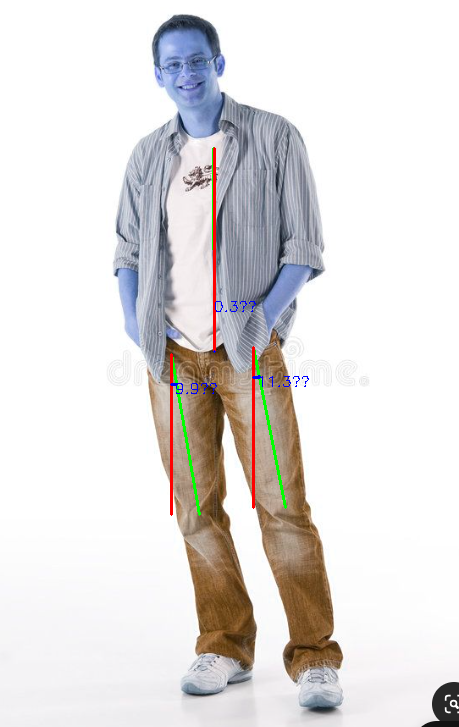

In [ ]:
import numpy as np
import cv2
# Specify the file path of your image
file_path = '/content/aaa.png'
# Load the image using OpenCV
img = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)
# Check if the image has 4 channels (e.g., RGBA) and convert to 3 channels if needed
if img.shape[2] == 4:
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
# Run inference to get frame_keypoints in (y, x, confidence) format
frame_keypoints = model.inference(img)[0]
# Extract coordinates for points
neck_point = (int(frame_keypoints[5][1]), int(frame_keypoints[5][0]))  # Neck point
hip_point = (int(frame_keypoints[14][1]), int(frame_keypoints[14][0]))  # Hip point (reference)
left_hip_point = (int(frame_keypoints[12][1]), int(frame_keypoints[12][0]))  # Left hip
right_hip_point = (int(frame_keypoints[13][1]), int(frame_keypoints[13][0]))  # Right hip
left_knee_point = (int(frame_keypoints[15][1]), int(frame_keypoints[15][0]))  # Left knee
right_knee_point = (int(frame_keypoints[16][1]), int(frame_keypoints[16][0]))  # Right knee
# Define vertical line points for neck and knees
vertical_line_neck_point = (hip_point[0], neck_point[1])  # Vertical point from hip towards neck
left_vertical_line_point = (left_hip_point[0], left_knee_point[1])  # Vertical point from left hip towards left knee
right_vertical_line_point = (right_hip_point[0], right_knee_point[1])  # Vertical point from right hip towards right knee
# Draw the lines: hip to neck, hips to knees, and vertical lines
cv2.line(img, hip_point, neck_point, (0, 255, 0), 2)  # Green line from hip to neck
cv2.line(img, left_hip_point, left_knee_point, (0, 255, 0), 2)  # Green line from left hip to left knee
cv2.line(img, right_hip_point, right_knee_point, (0, 255, 0), 2)  # Green line from right hip to right knee
# Draw vertical lines
cv2.line(img, hip_point, vertical_line_neck_point, (255, 0, 0), 2)  # Blue vertical line for neck
cv2.line(img, left_hip_point, left_vertical_line_point, (255, 0, 0), 2)  # Blue vertical line for left knee
cv2.line(img, right_hip_point, right_vertical_line_point, (255, 0, 0), 2)  # Blue vertical line for right knee

def calculate_angle(point1, point2, vertical_point):
    line_to_joint = np.array(point2) - np.array(point1)
    line_to_vertical = np.array(vertical_point) - np.array(point1)
    dot_product = np.dot(line_to_joint, line_to_vertical)
    magnitude_line_to_joint = np.linalg.norm(line_to_joint)
    magnitude_line_to_vertical = np.linalg.norm(line_to_vertical)
    cos_theta = dot_product / (magnitude_line_to_joint * magnitude_line_to_vertical)
    angle_radians = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    return np.degrees(angle_radians)

def draw_angle_arc(img, vertex, point1, point2, radius=30, color=(0, 0, 255), thickness=2):
    """
    Draw a semicircle to indicate the angle between two lines and add the angle value.

    Args:
        img: Image to draw on
        vertex: Point where the two lines meet (angle vertex)
        point1: First point to define the first line
        point2: Second point to define the second line
        radius: Radius of the semicircle
        color: Color of the semicircle (BGR format)
        thickness: Thickness of the semicircle line
    """
    # Calculate vectors
    v1 = np.array(point1) - np.array(vertex)
    v2 = np.array(point2) - np.array(vertex)

    # Calculate angles
    angle1 = np.arctan2(v1[1], v1[0])
    angle2 = np.arctan2(v2[1], v2[0])

    # Ensure angle2 > angle1
    if angle1 > angle2:
        angle1, angle2 = angle2, angle1

    # Draw arc
    start_angle = int(np.degrees(angle1))
    end_angle = int(np.degrees(angle2))

    # Draw the arc
    cv2.ellipse(img, vertex, (radius, radius), 0, start_angle, end_angle, color, thickness)

    # Calculate middle angle for text placement
    mid_angle = (angle1 + angle2) / 2
    text_x = int(vertex[0] + (radius + 10) * np.cos(mid_angle))
    text_y = int(vertex[1] + (radius + 10) * np.sin(mid_angle))

    return (text_x, text_y)

# Calculate angles
neck_angle_degrees = calculate_angle(hip_point, neck_point, vertical_line_neck_point)
left_angle_degrees = calculate_angle(left_hip_point, left_knee_point, left_vertical_line_point)
right_angle_degrees = calculate_angle(right_hip_point, right_knee_point, right_vertical_line_point)

# Draw angle arcs and add text
# Neck angle
text_pos = draw_angle_arc(img, hip_point, neck_point, vertical_line_neck_point)
cv2.putText(img, f"{neck_angle_degrees:.1f}", text_pos,
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

# Left knee angle
text_pos = draw_angle_arc(img, left_hip_point, left_knee_point, left_vertical_line_point)
cv2.putText(img, f"{left_angle_degrees:.1f}", text_pos,
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

# Right knee angle
text_pos = draw_angle_arc(img, right_hip_point, right_knee_point, right_vertical_line_point)
cv2.putText(img, f"{right_angle_degrees:.1f}", text_pos,
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

# Display the resulting image with lines and angles
from google.colab.patches import cv2_imshow
cv2_imshow(img[..., ::-1])
cv2.waitKey(0)
cv2.destroyAllWindows()

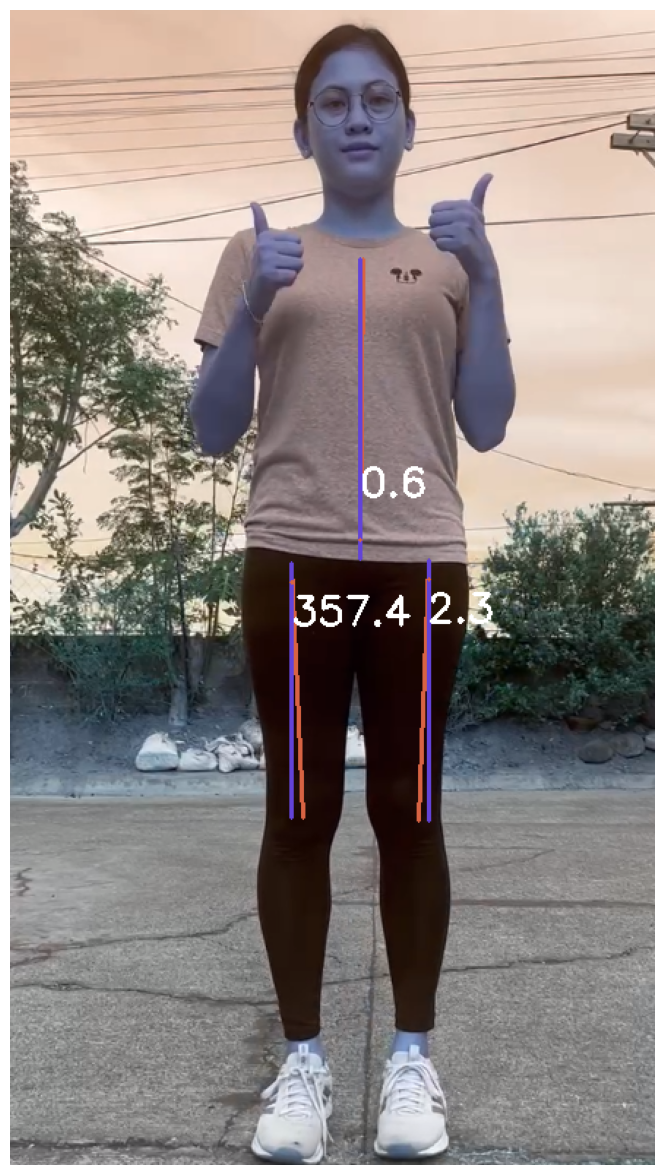

In [21]:
import numpy as np
import cv2

# Constants for visualization
BEST_RENDER_COLOR = (216, 99, 67)    # Main lines and angles
REF_RENDER_COLOR = (99, 67, 216)     # Reference/vertical lines
BACKGROUND_COLOR = (42, 42, 42)       # Background
FONT_SCALE = 1e-3                    # Dynamic font scaling
THICKNESS_SCALE = 1e-3               # Dynamic line thickness scaling
text_color = (255, 255, 255)         # White text color

# Specify the file path of your image
file_path = '/home/salam/frontal_gait/example.png'
# Load the image using OpenCV
img = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)
# Check if the image has 4 channels (e.g., RGBA) and convert to 3 channels if needed
if img.shape[2] == 4:
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)

# Calculate dynamic scales based on image dimensions
height, width = img.shape[:2]
image_diagonal = np.sqrt(height ** 2 + width ** 2)
font_size = FONT_SCALE * image_diagonal
thickness = max(2, int(THICKNESS_SCALE * image_diagonal))

# Run inference to get frame_keypoints in (y, x, confidence) format
frame_keypoints = model.inference(img)[0]

# Extract coordinates for points
neck_point = (int(frame_keypoints[5][1]), int(frame_keypoints[5][0]))  # Neck point
hip_point = (int(frame_keypoints[14][1]), int(frame_keypoints[14][0]))  # Hip point (reference)
left_hip_point = (int(frame_keypoints[12][1]), int(frame_keypoints[12][0]))  # Left hip
right_hip_point = (int(frame_keypoints[13][1]), int(frame_keypoints[13][0]))  # Right hip
left_knee_point = (int(frame_keypoints[15][1]), int(frame_keypoints[15][0]))  # Left knee
right_knee_point = (int(frame_keypoints[16][1]), int(frame_keypoints[16][0]))  # Right knee

# Define vertical line points for neck and knees
vertical_line_neck_point = (hip_point[0], neck_point[1])  # Vertical point from hip towards neck
left_vertical_line_point = (left_hip_point[0], left_knee_point[1])  # Vertical point from left hip towards left knee
right_vertical_line_point = (right_hip_point[0], right_knee_point[1])  # Vertical point from right hip towards right knee

# Draw the lines: hip to neck, hips to knees
cv2.line(img, hip_point, neck_point, BEST_RENDER_COLOR, thickness)  # Main line from hip to neck
cv2.line(img, left_hip_point, left_knee_point, BEST_RENDER_COLOR, thickness)  # Main line from left hip to left knee
cv2.line(img, right_hip_point, right_knee_point, BEST_RENDER_COLOR, thickness)  # Main line from right hip to right knee

# Draw vertical reference lines
cv2.line(img, hip_point, vertical_line_neck_point, REF_RENDER_COLOR, thickness)  # Reference line for neck
cv2.line(img, left_hip_point, left_vertical_line_point, REF_RENDER_COLOR, thickness)  # Reference line for left knee
cv2.line(img, right_hip_point, right_vertical_line_point, REF_RENDER_COLOR, thickness)  # Reference line for right knee

def calculate_angle(point1, point2, vertical_point):
    line_to_joint = np.array(point2) - np.array(point1)
    line_to_vertical = np.array(vertical_point) - np.array(point1)
    dot_product = np.dot(line_to_joint, line_to_vertical)
    magnitude_line_to_joint = np.linalg.norm(line_to_joint)
    magnitude_line_to_vertical = np.linalg.norm(line_to_vertical)
    cos_theta = dot_product / (magnitude_line_to_joint * magnitude_line_to_vertical)
    angle_radians = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    angle_degrees = np.degrees(angle_radians)

    # Determine if the angle is positive or negative
    if np.cross(line_to_joint, line_to_vertical) < 0:
        angle_degrees = 360 - angle_degrees

    return angle_degrees

def draw_angle_arc(img, vertex, point1, point2, radius=None, color=BEST_RENDER_COLOR, thickness=1):
    """
    Draw a semicircle to indicate the angle between two lines and add the angle value.

    Args:
        img: Image to draw on
        vertex: Point where the two lines meet (angle vertex)
        point1: First point to define the first line
        point2: Second point to define the second line
        radius: Radius of the semicircle (if None, calculated from image size)
        color: Color of the semicircle (BGR format)
        thickness: Thickness of the semicircle line
    """
    # Calculate dynamic radius if not provided
    if radius is None:
        radius = int(min(height, width) * 0.03)  # 3% of smaller image dimension

    # Calculate vectors
    v1 = np.array(point1) - np.array(vertex)
    v2 = np.array(point2) - np.array(vertex)

    # Calculate angles
    angle1 = np.arctan2(v1[1], v1[0])
    angle2 = np.arctan2(v2[1], v2[0])

    # Ensure angle2 > angle1
    if angle1 > angle2:
        angle1, angle2 = angle2, angle1

    # Draw arc
    start_angle = int(np.degrees(angle1))
    end_angle = int(np.degrees(angle2))

    # Draw the arc
    cv2.ellipse(img, vertex, (radius, radius), 0, start_angle, end_angle, color, thickness)

    # Calculate middle angle for text placement
    mid_angle = (angle1 + angle2) / 2
    text_x = int(vertex[0] + (radius + 30) * np.cos(mid_angle))
    text_y = int(vertex[1] + (radius + 30) * np.sin(mid_angle))

    return (text_x, text_y)

# Calculate angles
neck_angle_degrees = calculate_angle(hip_point, neck_point, vertical_line_neck_point)
left_angle_degrees = calculate_angle(left_hip_point, left_knee_point, left_vertical_line_point)
right_angle_degrees = calculate_angle(right_hip_point, right_knee_point, right_vertical_line_point)

# Draw angle arcs and add text
# Neck angle
text_pos = draw_angle_arc(img, hip_point, neck_point, vertical_line_neck_point, thickness=thickness)
cv2.putText(img, f"{360 - neck_angle_degrees:.1f}", text_pos,
            cv2.FONT_HERSHEY_SIMPLEX, font_size, text_color, thickness)

# Left knee angle
text_pos = draw_angle_arc(img, left_hip_point, left_knee_point, left_vertical_line_point, thickness=thickness)
cv2.putText(img, f"{360 - left_angle_degrees:.1f}", text_pos,
            cv2.FONT_HERSHEY_SIMPLEX, font_size, text_color, thickness)

# Right knee angle
text_pos = draw_angle_arc(img, right_hip_point, right_knee_point, right_vertical_line_point, thickness=thickness)
cv2.putText(img, f"{360 - right_angle_degrees:.1f}", text_pos,
            cv2.FONT_HERSHEY_SIMPLEX, font_size, text_color, thickness)

# Display the resulting image with lines and angles
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
plt.imshow(img)
plt.axis('off')
plt.show()

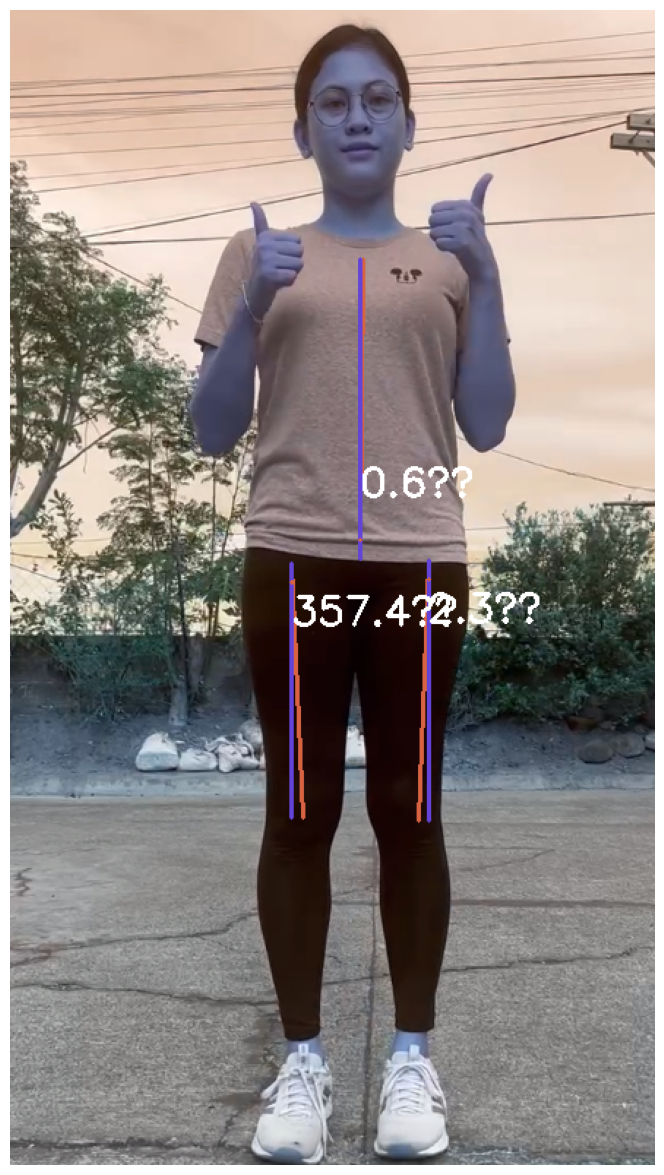

In [ ]:
import numpy as np
import cv2

# Constants for visualization
BEST_RENDER_COLOR = (216, 99, 67)    # Main lines and angles
REF_RENDER_COLOR = (99, 67, 216)     # Reference/vertical lines
BACKGROUND_COLOR = (42, 42, 42)       # Background
FONT_SCALE = 1e-3                    # Dynamic font scaling
THICKNESS_SCALE = 1e-3               # Dynamic line thickness scaling
text_color = (255, 255, 255)         # White text color

# Specify the file path of your image
file_path = '/home/salam/frontal_gait/example.png'
# Load the image using OpenCV
img = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)
# Check if the image has 4 channels (e.g., RGBA) and convert to 3 channels if needed
if img.shape[2] == 4:
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)

# Calculate dynamic scales based on image dimensions
height, width = img.shape[:2]
image_diagonal = np.sqrt(height ** 2 + width ** 2)
font_size = FONT_SCALE * image_diagonal
thickness = max(2, int(THICKNESS_SCALE * image_diagonal))

# Run inference to get frame_keypoints in (y, x, confidence) format
frame_keypoints = model.inference(img)[0]

# Extract coordinates for points
neck_point = (int(frame_keypoints[5][1]), int(frame_keypoints[5][0]))  # Neck point
hip_point = (int(frame_keypoints[14][1]), int(frame_keypoints[14][0]))  # Hip point (reference)
left_hip_point = (int(frame_keypoints[12][1]), int(frame_keypoints[12][0]))  # Left hip
right_hip_point = (int(frame_keypoints[13][1]), int(frame_keypoints[13][0]))  # Right hip
left_knee_point = (int(frame_keypoints[15][1]), int(frame_keypoints[15][0]))  # Left knee
right_knee_point = (int(frame_keypoints[16][1]), int(frame_keypoints[16][0]))  # Right knee

# Define vertical line points for neck and knees
vertical_line_neck_point = (hip_point[0], neck_point[1])  # Vertical point from hip towards neck
left_vertical_line_point = (left_hip_point[0], left_knee_point[1])  # Vertical point from left hip towards left knee
right_vertical_line_point = (right_hip_point[0], right_knee_point[1])  # Vertical point from right hip towards right knee

# Draw the lines: hip to neck, hips to knees
cv2.line(img, hip_point, neck_point, BEST_RENDER_COLOR, thickness)  # Main line from hip to neck
cv2.line(img, left_hip_point, left_knee_point, BEST_RENDER_COLOR, thickness)  # Main line from left hip to left knee
cv2.line(img, right_hip_point, right_knee_point, BEST_RENDER_COLOR, thickness)  # Main line from right hip to right knee

# Draw vertical reference lines
cv2.line(img, hip_point, vertical_line_neck_point, REF_RENDER_COLOR, thickness)  # Reference line for neck
cv2.line(img, left_hip_point, left_vertical_line_point, REF_RENDER_COLOR, thickness)  # Reference line for left knee
cv2.line(img, right_hip_point, right_vertical_line_point, REF_RENDER_COLOR, thickness)  # Reference line for right knee

def calculate_angle(point1, point2, vertical_point):
    line_to_joint = np.array(point2) - np.array(point1)
    line_to_vertical = np.array(vertical_point) - np.array(point1)
    dot_product = np.dot(line_to_joint, line_to_vertical)
    magnitude_line_to_joint = np.linalg.norm(line_to_joint)
    magnitude_line_to_vertical = np.linalg.norm(line_to_vertical)
    cos_theta = dot_product / (magnitude_line_to_joint * magnitude_line_to_vertical)
    angle_radians = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    angle_degrees = np.degrees(angle_radians)

    # Determine if the angle is positive or negative
    if np.cross(line_to_joint, line_to_vertical) < 0:
        angle_degrees = 360 - angle_degrees

    return angle_degrees

def draw_angle_arc(img, vertex, point1, point2, radius=None, color=BEST_RENDER_COLOR, thickness=1):
    """
    Draw a semicircle to indicate the angle between two lines and add the angle value.

    Args:
        img: Image to draw on
        vertex: Point where the two lines meet (angle vertex)
        point1: First point to define the first line
        point2: Second point to define the second line
        radius: Radius of the semicircle (if None, calculated from image size)
        color: Color of the semicircle (BGR format)
        thickness: Thickness of the semicircle line
    """
    # Calculate dynamic radius if not provided
    if radius is None:
        radius = int(min(height, width) * 0.03)  # 3% of smaller image dimension

    # Calculate vectors
    v1 = np.array(point1) - np.array(vertex)
    v2 = np.array(point2) - np.array(vertex)

    # Calculate angles
    angle1 = np.arctan2(v1[1], v1[0])
    angle2 = np.arctan2(v2[1], v2[0])

    # Ensure angle2 > angle1
    if angle1 > angle2:
        angle1, angle2 = angle2, angle1

    # Draw arc
    start_angle = int(np.degrees(angle1))
    end_angle = int(np.degrees(angle2))

    # Draw the arc
    cv2.ellipse(img, vertex, (radius, radius), 0, start_angle, end_angle, color, thickness)

    # Calculate middle angle for text placement
    mid_angle = (angle1 + angle2) / 2
    text_x = int(vertex[0] + (radius + 30) * np.cos(mid_angle))
    text_y = int(vertex[1] + (radius + 30) * np.sin(mid_angle))

    return (text_x, text_y)

# Calculate angles
neck_angle_degrees = calculate_angle(hip_point, neck_point, vertical_line_neck_point)
left_angle_degrees = calculate_angle(left_hip_point, left_knee_point, left_vertical_line_point)
right_angle_degrees = calculate_angle(right_hip_point, right_knee_point, right_vertical_line_point)

# Draw angle arcs and add text
# Neck angle
text_pos = draw_angle_arc(img, hip_point, neck_point, vertical_line_neck_point, thickness=thickness)
cv2.putText(img, f"{360 - neck_angle_degrees:.1f}", text_pos,
            cv2.FONT_HERSHEY_SIMPLEX, font_size, text_color, thickness)

# Left knee angle
text_pos = draw_angle_arc(img, left_hip_point, left_knee_point, left_vertical_line_point, thickness=thickness)
cv2.putText(img, f"{360 - left_angle_degrees:.1f}", text_pos,
            cv2.FONT_HERSHEY_SIMPLEX, font_size, text_color, thickness)

# Right knee angle
text_pos = draw_angle_arc(img, right_hip_point, right_knee_point, right_vertical_line_point, thickness=thickness)
cv2.putText(img, f"{360 - right_angle_degrees:.1f}", text_pos,
            cv2.FONT_HERSHEY_SIMPLEX, font_size, text_color, thickness)

# Display the resulting image with lines and angles
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
plt.imshow(img)
plt.axis('off')
plt.show()

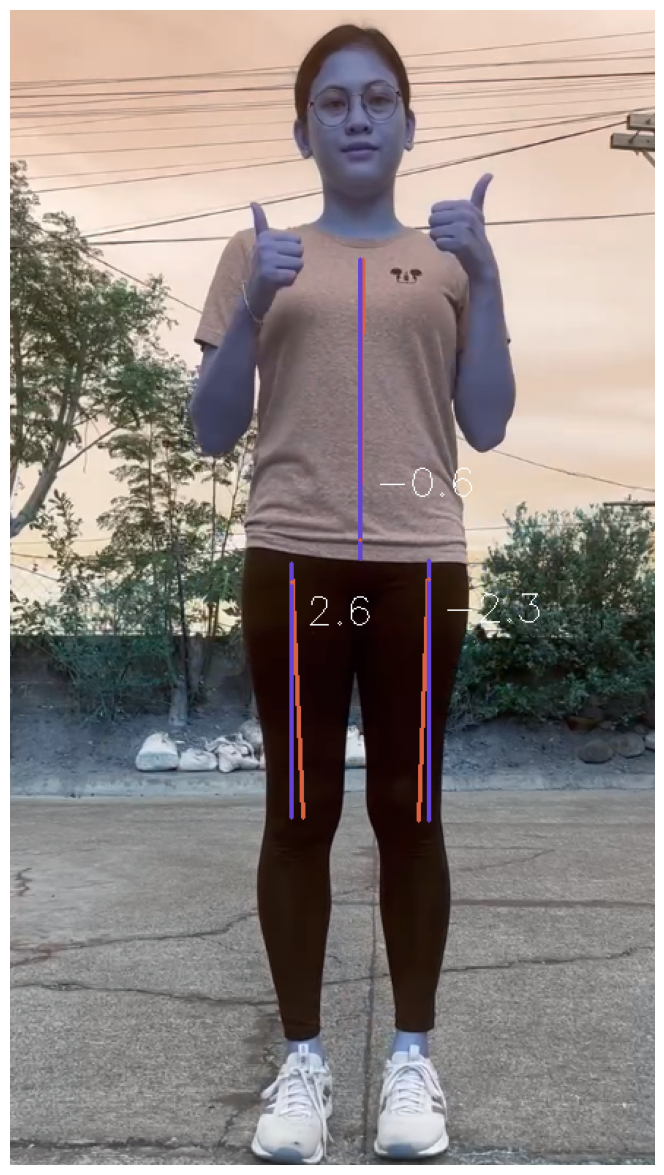

In [29]:
import numpy as np
import cv2

# Constants for visualization
BEST_RENDER_COLOR = (216, 99, 67)    # Main lines and angles
REF_RENDER_COLOR = (99, 67, 216)     # Reference/vertical lines
BACKGROUND_COLOR = (42, 42, 42)       # Background
FONT_SCALE = 1e-3                    # Dynamic font scaling
THICKNESS_SCALE = 1e-3               # Dynamic line thickness scaling
text_color = (255, 255, 255)         # White text color

# Specify the file path of your image
file_path = '/home/salam/frontal_gait/example.png'
# Load the image using OpenCV
img = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)
# Check if the image has 4 channels (e.g., RGBA) and convert to 3 channels if needed
if img.shape[2] == 4:
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)

# Calculate dynamic scales based on image dimensions
height, width = img.shape[:2]
image_diagonal = np.sqrt(height ** 2 + width ** 2)
font_size = FONT_SCALE * image_diagonal
thickness = max(2, int(THICKNESS_SCALE * image_diagonal))

# Run inference to get frame_keypoints in (y, x, confidence) format
frame_keypoints = model.inference(img)[0]

# Extract coordinates for points
neck_point = (int(frame_keypoints[5][1]), int(frame_keypoints[5][0]))  # Neck point
hip_point = (int(frame_keypoints[14][1]), int(frame_keypoints[14][0]))  # Hip point (reference)
left_hip_point = (int(frame_keypoints[12][1]), int(frame_keypoints[12][0]))  # Left hip
right_hip_point = (int(frame_keypoints[13][1]), int(frame_keypoints[13][0]))  # Right hip
left_knee_point = (int(frame_keypoints[15][1]), int(frame_keypoints[15][0]))  # Left knee
right_knee_point = (int(frame_keypoints[16][1]), int(frame_keypoints[16][0]))  # Right knee

# Define vertical line points for neck and knees
vertical_line_neck_point = (hip_point[0], neck_point[1])  # Vertical point from hip towards neck
left_vertical_line_point = (left_hip_point[0], left_knee_point[1])  # Vertical point from left hip towards left knee
right_vertical_line_point = (right_hip_point[0], right_knee_point[1])  # Vertical point from right hip towards right knee

# Draw the lines: hip to neck, hips to knees
cv2.line(img, hip_point, neck_point, BEST_RENDER_COLOR, thickness)  # Main line from hip to neck
cv2.line(img, left_hip_point, left_knee_point, BEST_RENDER_COLOR, thickness)  # Main line from left hip to left knee
cv2.line(img, right_hip_point, right_knee_point, BEST_RENDER_COLOR, thickness)  # Main line from right hip to right knee

# Draw vertical reference lines
cv2.line(img, hip_point, vertical_line_neck_point, REF_RENDER_COLOR, thickness)  # Reference line for neck
cv2.line(img, left_hip_point, left_vertical_line_point, REF_RENDER_COLOR, thickness)  # Reference line for left knee
cv2.line(img, right_hip_point, right_vertical_line_point, REF_RENDER_COLOR, thickness)  # Reference line for right knee

def calculate_angle(point1, point2, vertical_point):
    line_to_joint = np.array(point2) - np.array(point1)
    line_to_vertical = np.array(vertical_point) - np.array(point1)
    dot_product = np.dot(line_to_joint, line_to_vertical)
    magnitude_line_to_joint = np.linalg.norm(line_to_joint)
    magnitude_line_to_vertical = np.linalg.norm(line_to_vertical)
    cos_theta = dot_product / (magnitude_line_to_joint * magnitude_line_to_vertical)
    angle_radians = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    angle_degrees = np.degrees(angle_radians)

    # Determine the sign of the angle (positive or negative)
    if np.cross(line_to_joint, line_to_vertical) < 0:
        angle_degrees = 360 - angle_degrees

    return angle_degrees

def draw_angle_arc(img, vertex, point1, point2, radius=None, color=BEST_RENDER_COLOR, thickness=1):
    """
    Draw a semicircle to indicate the angle between two lines and add the angle value.

    Args:
        img: Image to draw on
        vertex: Point where the two lines meet (angle vertex)
        point1: First point to define the first line
        point2: Second point to define the second line
        radius: Radius of the semicircle (if None, calculated from image size)
        color: Color of the semicircle (BGR format)
        thickness: Thickness of the semicircle line
    """
    # Calculate dynamic radius if not provided
    if radius is None:
        radius = int(min(height, width) * 0.03)  # 3% of smaller image dimension

    # Calculate vectors
    v1 = np.array(point1) - np.array(vertex)
    v2 = np.array(point2) - np.array(vertex)

    # Calculate angles
    angle1 = np.arctan2(v1[1], v1[0])
    angle2 = np.arctan2(v2[1], v2[0])

    # Ensure angle2 > angle1
    if angle1 > angle2:
        angle1, angle2 = angle2, angle1

    # Draw arc
    start_angle = int(np.degrees(angle1))
    end_angle = int(np.degrees(angle2))

    # Draw the arc
    cv2.ellipse(img, vertex, (radius, radius), 0, start_angle, end_angle, color, thickness)

    # Calculate middle angle for text placement
    mid_angle = (angle1 + angle2) / 2
    text_x = int(vertex[0] + (radius + 30) * np.cos(mid_angle)) + 10  # Offset by 5 pixels to the right
    text_y = int(vertex[1] + (radius + 30) * np.sin(mid_angle))

    return (text_x, text_y)

# Calculate angles
neck_angle_degrees = calculate_angle(hip_point, neck_point, vertical_line_neck_point)
left_angle_degrees = calculate_angle(left_hip_point, left_knee_point, left_vertical_line_point)
right_angle_degrees = calculate_angle(right_hip_point, right_knee_point, right_vertical_line_point)


# Adjust angle if greater than 180
if neck_angle_degrees > 180:
    neck_angle_degrees = neck_angle_degrees - 360
if left_angle_degrees > 180:
    left_angle_degrees = left_angle_degrees - 360
if right_angle_degrees > 180:
    right_angle_degrees = right_angle_degrees - 360

# Draw angle arcs and add text
# Neck angle
text_pos = draw_angle_arc(img, hip_point, neck_point, vertical_line_neck_point, thickness=thickness)
cv2.putText(img, f"{neck_angle_degrees:.1f}", text_pos,
            cv2.FONT_HERSHEY_SIMPLEX, font_size, text_color, 1)

# Left knee angle
text_pos = draw_angle_arc(img, left_hip_point, left_knee_point, left_vertical_line_point, thickness=thickness)
cv2.putText(img, f"{left_angle_degrees:.1f}", text_pos,
            cv2.FONT_HERSHEY_SIMPLEX, font_size, text_color, 1)

# Right knee angle
text_pos = draw_angle_arc(img, right_hip_point, right_knee_point, right_vertical_line_point, thickness=thickness)
cv2.putText(img, f"{right_angle_degrees:.1f}", text_pos,
            cv2.FONT_HERSHEY_SIMPLEX, font_size, text_color, 1)

# Display the resulting image with lines and angles
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
plt.imshow(img)
plt.axis('off')
plt.show()

{0: array([[     139.58,      132.39,     0.99818],
       [      131.1,      136.55,     0.99174],
       [     133.16,       123.4,     0.98271],
       [     128.21,      140.82,     0.93389],
       [     133.74,      107.09,     0.99785],
       [     171.98,      121.31,      1.0258],
       [     170.86,      158.54,     0.94235],
       [     174.21,      84.958,     0.93242],
       [     204.26,      198.03,      0.9325],
       [     222.56,      71.107,      0.9492],
       [     256.07,      174.24,     0.72049],
       [      269.6,       67.97,     0.93223],
       [     281.72,       147.8,     0.87461],
       [      283.6,      105.47,     0.87926],
       [     282.65,      126.85,     0.91896],
       [     354.77,      142.72,     0.92032],
       [     350.64,      119.53,     0.92825],
       [     427.12,      139.46,      0.9255],
       [     409.13,      127.07,     0.90416],
       [     442.72,      133.76,     0.88989],
       [     442.45,      144.42,   

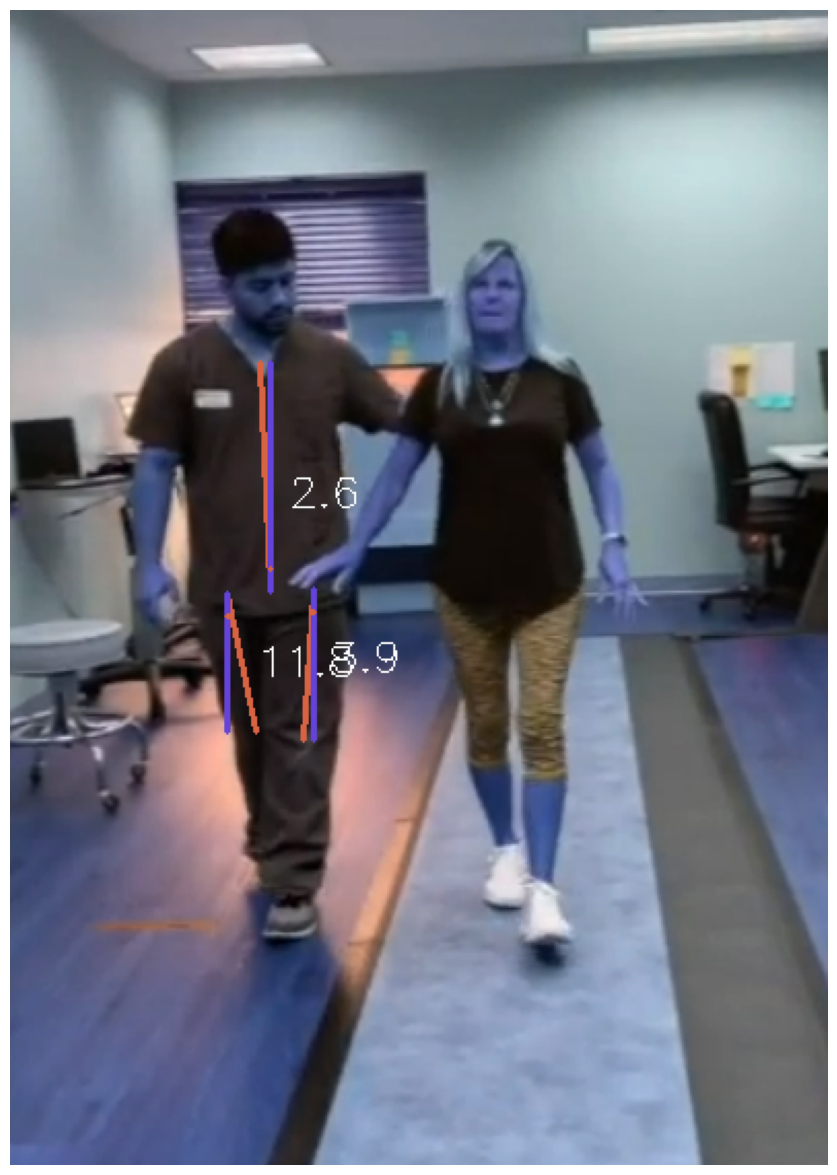

In [72]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Constants for visualization
BEST_RENDER_COLOR = (216, 99, 67)    # Main lines and angles
REF_RENDER_COLOR = (99, 67, 216)     # Reference/vertical lines
BACKGROUND_COLOR = (42, 42, 42)       # Background
FONT_SCALE = 1e-3                    # Dynamic font scaling
THICKNESS_SCALE = 1e-3               # Dynamic line thickness scaling
text_color = (255, 255, 255)         # White text color

DcctorIsLeft = False

# Specify the file path of your image
file_path = '/home/salam/frontal_gait/ssss.png'
# Load the image using OpenCV
img = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)
# Check if the image has 4 channels (e.g., RGBA) and convert to 3 channels if needed
if img.shape[2] == 4:
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)

# Calculate dynamic scales based on image dimensions
height, width = img.shape[:2]
image_diagonal = np.sqrt(height ** 2 + width ** 2)
font_size = FONT_SCALE * image_diagonal
thickness = max(2, int(THICKNESS_SCALE * image_diagonal))

# Run inference to get frame_keypoints in (y, x, confidence) format



frame_keypoints = model.inference(img)

frame_keypoints_copy = frame_keypoints
final_frame_keypoints = frame_keypoints[1]
print(frame_keypoints)

if DcctorIsLeft:
    if frame_keypoints[1][0][1]>frame_keypoints[0][0][1]:
        final_frame_keypoints = frame_keypoints[1]
    else:
        final_frame_keypoints = frame_keypoints[0]
else:
    if frame_keypoints[1][0][1]<frame_keypoints[0][0][1]:
        final_frame_keypoints = frame_keypoints[1]
    else:
        final_frame_keypoints = frame_keypoints[0]

frame_keypoints= final_frame_keypoints

# Extract coordinates for points
neck_point = (int(frame_keypoints[5][1]), int(frame_keypoints[5][0]))  # Neck point
hip_point = (int(frame_keypoints[14][1]), int(frame_keypoints[14][0]))  # Hip point (reference)
left_hip_point = (int(frame_keypoints[12][1]), int(frame_keypoints[12][0]))  # Left hip
right_hip_point = (int(frame_keypoints[13][1]), int(frame_keypoints[13][0]))  # Right hip
left_knee_point = (int(frame_keypoints[15][1]), int(frame_keypoints[15][0]))  # Left knee
right_knee_point = (int(frame_keypoints[16][1]), int(frame_keypoints[16][0]))  # Right knee

# Define vertical line points for neck and knees
vertical_line_neck_point = (hip_point[0], neck_point[1])  # Vertical point from hip towards neck
left_vertical_line_point = (left_hip_point[0], left_knee_point[1])  # Vertical point from left hip towards left knee
right_vertical_line_point = (right_hip_point[0], right_knee_point[1])  # Vertical point from right hip towards right knee

# Draw the lines: hip to neck, hips to knees
cv2.line(img, hip_point, neck_point, BEST_RENDER_COLOR, thickness)  # Main line from hip to neck
cv2.line(img, left_hip_point, left_knee_point, BEST_RENDER_COLOR, thickness)  # Main line from left hip to left knee
cv2.line(img, right_hip_point, right_knee_point, BEST_RENDER_COLOR, thickness)  # Main line from right hip to right knee

# Draw vertical reference lines
cv2.line(img, hip_point, vertical_line_neck_point, REF_RENDER_COLOR, thickness)  # Reference line for neck
cv2.line(img, left_hip_point, left_vertical_line_point, REF_RENDER_COLOR, thickness)  # Reference line for left knee
cv2.line(img, right_hip_point, right_vertical_line_point, REF_RENDER_COLOR, thickness)  # Reference line for right knee

def calculate_angle(point1, point2, vertical_point):
    line_to_joint = np.array(point2) - np.array(point1)
    line_to_vertical = np.array(vertical_point) - np.array(point1)
    dot_product = np.dot(line_to_joint, line_to_vertical)
    magnitude_line_to_joint = np.linalg.norm(line_to_joint)
    magnitude_line_to_vertical = np.linalg.norm(line_to_vertical)
    cos_theta = dot_product / (magnitude_line_to_joint * magnitude_line_to_vertical)
    angle_radians = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    angle_degrees = np.degrees(angle_radians)

    # Determine the sign of the angle (positive or negative) based on cross product
    if np.cross(line_to_joint, line_to_vertical) < 0:
        angle_degrees = 360 - angle_degrees

    return angle_degrees

def is_between_vertical_lines(knee_point, left_vertical, right_vertical):
    """
    Determines if the knee point is between the two vertical lines defined by the left and right vertical lines.
    """

    print("knee point is:",knee_point)
    print("left vertical line is:", left_vertical)
    print("right vertical line is:", right_vertical)
    # Get the x-coordinates of the left and right vertical lines
    x_left = left_vertical[0]
    x_right = right_vertical[0]
    
    # Ensure that the x-coordinate of left vertical line is always smaller
    if x_left > x_right:
        # Swap the coordinates to maintain left < right order
        x_left, x_right = x_right, x_left

    # Check if the knee point's x-coordinate is between the two vertical lines
    if x_left <= knee_point[0] <= x_right:
        print("True")
        return True
    else:
        print("False")
        return False



def draw_angle_arc(img, vertex, point1, point2, radius=None, color=BEST_RENDER_COLOR, thickness=1):
    """
    Draw a semicircle to indicate the angle between two lines and add the angle value.

    Args:
        img: Image to draw on
        vertex: Point where the two lines meet (angle vertex)
        point1: First point to define the first line
        point2: Second point to define the second line
        radius: Radius of the semicircle (if None, calculated from image size)
        color: Color of the semicircle (BGR format)
        thickness: Thickness of the semicircle line
    """
    # Calculate dynamic radius if not provided
    if radius is None:
        radius = int(min(height, width) * 0.03)  # 3% of smaller image dimension

    # Calculate vectors
    v1 = np.array(point1) - np.array(vertex)
    v2 = np.array(point2) - np.array(vertex)

    # Calculate angles
    angle1 = np.arctan2(v1[1], v1[0])
    angle2 = np.arctan2(v2[1], v2[0])

    # Ensure angle2 > angle1
    if angle1 > angle2:
        angle1, angle2 = angle2, angle1

    # Draw arc
    start_angle = int(np.degrees(angle1))
    end_angle = int(np.degrees(angle2))

    # Draw the arc
    cv2.ellipse(img, vertex, (radius, radius), 0, start_angle, end_angle, color, thickness)

    # Calculate middle angle for text placement
    mid_angle = (angle1 + angle2) / 2
    text_x = int(vertex[0] + (radius + 30) * np.cos(mid_angle)) + 10  # Offset by 5 pixels to the right
    text_y = int(vertex[1] + (radius + 30) * np.sin(mid_angle))

    return (text_x, text_y)

# Calculate angles
neck_angle_degrees = calculate_angle(hip_point, neck_point, vertical_line_neck_point)
left_angle_degrees = calculate_angle(left_hip_point, left_knee_point, left_vertical_line_point)
right_angle_degrees = calculate_angle(right_hip_point, right_knee_point, right_vertical_line_point)

# Adjust angle if greater than 180
if neck_angle_degrees > 180:
    neck_angle_degrees = 360 - neck_angle_degrees 
if left_angle_degrees > 180:
    left_angle_degrees = 360 -left_angle_degrees
if right_angle_degrees > 180:
    right_angle_degrees = 360 - right_angle_degrees

# Adjust angle sign based on the knee's position relative to the vertical lines
left_hip_vertical = (left_hip_point[0], left_knee_point[1])
right_hip_vertical = (right_hip_point[0], right_knee_point[1])

# For left knee
if not is_between_vertical_lines(left_knee_point, left_hip_vertical, right_hip_vertical):
    left_angle_degrees = -left_angle_degrees

# For right knee
if not is_between_vertical_lines(right_knee_point, left_hip_vertical, right_hip_vertical):
    right_angle_degrees = -right_angle_degrees

# Draw angle arcs and add text
# Neck angle
text_pos = draw_angle_arc(img, hip_point, neck_point, vertical_line_neck_point, thickness=thickness)
cv2.putText(img, f"{neck_angle_degrees:.1f}", text_pos,
            cv2.FONT_HERSHEY_SIMPLEX, font_size, text_color, 1)

# Left knee angle
text_pos = draw_angle_arc(img, left_hip_point, left_knee_point, left_vertical_line_point, thickness=thickness)
cv2.putText(img, f"{left_angle_degrees:.1f}", text_pos,
            cv2.FONT_HERSHEY_SIMPLEX, font_size, text_color, 1)

# Right knee angle
text_pos = draw_angle_arc(img, right_hip_point, right_knee_point, right_vertical_line_point, thickness=thickness)
cv2.putText(img, f"{right_angle_degrees:.1f}", text_pos,
            cv2.FONT_HERSHEY_SIMPLEX, font_size, text_color, 1)

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
plt.imshow(img)
plt.axis('off')
plt.show()


In [40]:
import numpy as np
import cv2
import csv
import os
from tqdm import tqdm
# Constants for visualization
BEST_RENDER_COLOR = (216, 99, 67)    # Main lines and angles
REF_RENDER_COLOR = (99, 67, 216)     # Reference/vertical lines
BACKGROUND_COLOR = (42, 42, 42)      # Background
FONT_SCALE = 1e-3                    # Dynamic font scaling
THICKNESS_SCALE = 1e-3               # Dynamic line thickness scaling
text_color = (255, 255, 255)         # White text color

# Specify input video path and output paths
input_video_path = '/home/salam/frontal_gait/videos/IMG_3236.mp4'
output_video_path = '/home/salam/frontal_gait/videos/IMG_3236_OO.mp4'
output_csv_path = '/home/salam/frontal_gait/csvs/IMG_3236_angles.csv'

# Open input video
cap = cv2.VideoCapture(input_video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# Initialize video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Open CSV file for writing
with open(output_csv_path, mode='w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Frame', 'Neck Angle', 'Left Knee Angle', 'Right Knee Angle'])

    # Process each frame
    frame_number = 0
    for frame_number in tqdm(range(total_frames), desc="Processing Video", unit="frame"):
        ret, frame = cap.read()
        if not ret:
            break

        # Run inference to get frame_keypoints in (y, x, confidence) format
        frame_keypoints = model.inference(frame)[0]

        # Extract coordinates for points
        neck_point = (int(frame_keypoints[5][1]), int(frame_keypoints[5][0]))  # Neck point
        hip_point = (int(frame_keypoints[14][1]), int(frame_keypoints[14][0]))  # Hip point (reference)
        left_hip_point = (int(frame_keypoints[12][1]), int(frame_keypoints[12][0]))  # Left hip
        right_hip_point = (int(frame_keypoints[13][1]), int(frame_keypoints[13][0]))  # Right hip
        left_knee_point = (int(frame_keypoints[15][1]), int(frame_keypoints[15][0]))  # Left knee
        right_knee_point = (int(frame_keypoints[16][1]), int(frame_keypoints[16][0]))  # Right knee

        # Define vertical line points for neck and knees
        vertical_line_neck_point = (hip_point[0], neck_point[1])  # Vertical point from hip towards neck
        left_vertical_line_point = (left_hip_point[0], left_knee_point[1])  # Vertical point from left hip towards left knee
        right_vertical_line_point = (right_hip_point[0], right_knee_point[1])  # Vertical point from right hip towards right knee

        # Draw the lines: hip to neck, hips to knees
        cv2.line(frame, hip_point, neck_point, BEST_RENDER_COLOR, thickness)  # Main line from hip to neck
        cv2.line(frame, left_hip_point, left_knee_point, BEST_RENDER_COLOR, thickness)  # Main line from left hip to left knee
        cv2.line(frame, right_hip_point, right_knee_point, BEST_RENDER_COLOR, thickness)  # Main line from right hip to right knee

        # Draw vertical reference lines
        cv2.line(frame, hip_point, vertical_line_neck_point, REF_RENDER_COLOR, thickness)  # Reference line for neck
        cv2.line(frame, left_hip_point, left_vertical_line_point, REF_RENDER_COLOR, thickness)  # Reference line for left knee
        cv2.line(frame, right_hip_point, right_vertical_line_point, REF_RENDER_COLOR, thickness)  # Reference line for right knee

        def calculate_angle(point1, point2, vertical_point):
            line_to_joint = np.array(point2) - np.array(point1)
            line_to_vertical = np.array(vertical_point) - np.array(point1)
            dot_product = np.dot(line_to_joint, line_to_vertical)
            magnitude_line_to_joint = np.linalg.norm(line_to_joint)
            magnitude_line_to_vertical = np.linalg.norm(line_to_vertical)
            cos_theta = dot_product / (magnitude_line_to_joint * magnitude_line_to_vertical)
            angle_radians = np.arccos(np.clip(cos_theta, -1.0, 1.0))
            angle_degrees = np.degrees(angle_radians)

            # Determine the sign of the angle (positive or negative) based on cross product
            if np.cross(line_to_joint, line_to_vertical) < 0:
                angle_degrees = 360 - angle_degrees

            return angle_degrees

        def is_between_vertical_lines(knee_point, left_vertical, right_vertical):
            """
            Determines if the knee point is between the two vertical lines defined by the left and right vertical lines.
            """

            # print("knee point is:",knee_point)
            # print("left vertical line is:", left_vertical)
            # print("right vertical line is:", right_vertical)
            # Get the x-coordinates of the left and right vertical lines
            x_left = left_vertical[0]
            x_right = right_vertical[0]
            
            # Ensure that the x-coordinate of left vertical line is always smaller
            if x_left > x_right:
                # Swap the coordinates to maintain left < right order
                x_left, x_right = x_right, x_left

            # Check if the knee point's x-coordinate is between the two vertical lines
            if x_left <= knee_point[0] <= x_right:
                # print("True")
                return True
            else:
                # print("False")
                return False



        def draw_angle_arc(frame, vertex, point1, point2, radius=None, color=BEST_RENDER_COLOR, thickness=1):
            """
            Draw a semicircle to indicate the angle between two lines and add the angle value.

            Args:
                img: Image to draw on
                vertex: Point where the two lines meet (angle vertex)
                point1: First point to define the first line
                point2: Second point to define the second line
                radius: Radius of the semicircle (if None, calculated from image size)
                color: Color of the semicircle (BGR format)
                thickness: Thickness of the semicircle line
            """
            # Calculate dynamic radius if not provided
            if radius is None:
                radius = int(min(height, width) * 0.03)  # 3% of smaller image dimension

            # Calculate vectors
            v1 = np.array(point1) - np.array(vertex)
            v2 = np.array(point2) - np.array(vertex)

            # Calculate angles
            angle1 = np.arctan2(v1[1], v1[0])
            angle2 = np.arctan2(v2[1], v2[0])

            # Ensure angle2 > angle1
            if angle1 > angle2:
                angle1, angle2 = angle2, angle1

            # Draw arc
            start_angle = int(np.degrees(angle1))
            end_angle = int(np.degrees(angle2))

            # Draw the arc
            cv2.ellipse(frame, vertex, (radius, radius), 0, start_angle, end_angle, color, thickness)

            # Calculate middle angle for text placement
            mid_angle = (angle1 + angle2) / 2
            text_x = int(vertex[0] + (radius + 30) * np.cos(mid_angle)) + 10  # Offset by 5 pixels to the right
            text_y = int(vertex[1] + (radius + 30) * np.sin(mid_angle))

            return (text_x, text_y)

        # Calculate angles
        neck_angle = calculate_angle(hip_point, neck_point, vertical_line_neck_point)
        left_knee_angle = calculate_angle(left_hip_point, left_knee_point, left_vertical_line_point)
        right_knee_angle = calculate_angle(right_hip_point, right_knee_point, right_vertical_line_point)

        # Adjust angle if greater than 180
        if neck_angle_degrees > 180:
            neck_angle_degrees = 360 - neck_angle_degrees 
        if left_angle_degrees > 180:
            left_angle_degrees = 360 -left_angle_degrees
        if right_angle_degrees > 180:
            right_angle_degrees = 360 - right_angle_degrees

        # Adjust angle sign based on the knee's position relative to the vertical lines
        left_hip_vertical = (left_hip_point[0], left_knee_point[1])
        right_hip_vertical = (right_hip_point[0], right_knee_point[1])

        # For left knee
        if not is_between_vertical_lines(left_knee_point, left_hip_vertical, right_hip_vertical):
            left_angle_degrees = -left_angle_degrees

        # For right knee
        if not is_between_vertical_lines(right_knee_point, left_hip_vertical, right_hip_vertical):
            right_angle_degrees = -right_angle_degrees

        # Draw angle arcs and add text
        # Neck angle
        text_pos = draw_angle_arc(frame, hip_point, neck_point, vertical_line_neck_point, thickness=thickness)
        cv2.putText(frame, f"{neck_angle_degrees:.1f}", text_pos,
                    cv2.FONT_HERSHEY_SIMPLEX, 1, text_color, 1)

        # Left knee angle
        text_pos = draw_angle_arc(frame, left_hip_point, left_knee_point, left_vertical_line_point, thickness=thickness)
        cv2.putText(frame, f"{left_angle_degrees:.1f}", text_pos,
                    cv2.FONT_HERSHEY_SIMPLEX, 1, text_color, 1)

        # Right knee angle
        text_pos = draw_angle_arc(frame, right_hip_point, right_knee_point, right_vertical_line_point, thickness=thickness)
        cv2.putText(frame, f"{right_angle_degrees:.1f}", text_pos,
                    cv2.FONT_HERSHEY_SIMPLEX, 1, text_color, 1)

        # Write angle values to CSV file
        csv_writer.writerow([frame_number, neck_angle, left_knee_angle, right_knee_angle])

        # Write the frame to the output video
        out.write(frame)
        frame_number += 1

# Release resources
cap.release()
out.release()








Processing Video:   1%|          | 5/447 [00:05<08:09,  1.11s/frame]


KeyboardInterrupt: 

In [ ]:
#@title Custom image
from google.colab import files
import numpy as np
from PIL import Image
from urllib.request import urlopen
import matplotlib.pyplot as plt
from vit_utils.visualization import draw_points_and_skeleton, joints_dict

img = np.array(Image.open(list(files.upload().keys())[0]), dtype=np.uint8)

frame_keypoints = model.inference(img)
img = model.draw(show_yolo=True)

from google.colab.patches import cv2_imshow
cv2_imshow(img[..., ::-1])

In [51]:
import numpy as np
import cv2
import csv
from tqdm import tqdm
from PIL import Image

def calculate_angle(point1, point2, vertical_point, is_positive=True):
    line_to_joint = np.array(point2) - np.array(point1)
    line_to_vertical = np.array(vertical_point) - np.array(point1)
    dot_product = np.dot(line_to_joint, line_to_vertical)
    magnitude_line_to_joint = np.linalg.norm(line_to_joint)
    magnitude_line_to_vertical = np.linalg.norm(line_to_vertical)
    cos_theta = dot_product / (magnitude_line_to_joint * magnitude_line_to_vertical)
    angle_radians = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    angle_degrees = np.degrees(angle_radians)
    
    # Assign positive or negative angle based on the `is_positive` flag
    return angle_degrees if is_positive else -angle_degrees

def is_between_vertical_lines(knee_point, left_hip_vertical, right_hip_vertical):
    # Check if the knee x-coordinate is between the x-coordinates of the two vertical lines
    x_min = min(left_hip_vertical[0], right_hip_vertical[0])
    x_max = max(left_hip_vertical[0], right_hip_vertical[0])
    return x_min <= knee_point[0] <= x_max

def process_video(input_path, output_path, csv_path, model):
    # Open the video file
    cap = cv2.VideoCapture(input_path)
    
    # Get video properties
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Set up video writer
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))
    
    # Create CSV file and write header
    with open(csv_path, 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow(['Frame', 'Neck_Angle', 'Left_Knee_Angle', 'Right_Knee_Angle'])
        
        frame_number = 0
        pbar = tqdm(total=total_frames, desc="Processing frames")
        
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
                
            frame_number += 1
            
            frame_keypoints = model.inference(frame)[0]
            
            try:
                # Extract coordinates for points
                neck_point = (int(frame_keypoints[5][1]), int(frame_keypoints[5][0]))
                hip_point = (int(frame_keypoints[14][1]), int(frame_keypoints[14][0]))
                left_hip_point = (int(frame_keypoints[12][1]), int(frame_keypoints[12][0]))
                right_hip_point = (int(frame_keypoints[13][1]), int(frame_keypoints[13][0]))
                left_knee_point = (int(frame_keypoints[15][1]), int(frame_keypoints[15][0]))
                right_knee_point = (int(frame_keypoints[16][1]), int(frame_keypoints[16][0]))
                
                # Define vertical line points
                left_hip_vertical = (left_hip_point[0], left_knee_point[1])
                right_hip_vertical = (right_hip_point[0], right_knee_point[1])
                
                # Calculate angles with sign based on whether the knee point is between the two vertical lines
                neck_angle = calculate_angle(hip_point, neck_point, (hip_point[0], neck_point[1]))
                
                is_left_positive = is_between_vertical_lines(left_knee_point, left_hip_vertical, right_hip_vertical)
                left_angle = calculate_angle(left_hip_point, left_knee_point, left_hip_vertical, is_left_positive)
                
                is_right_positive = is_between_vertical_lines(right_knee_point, left_hip_vertical, right_hip_vertical)
                right_angle = calculate_angle(right_hip_point, right_knee_point, right_hip_vertical, is_right_positive)
                
                # Write calculated angles to CSV
                csvwriter.writerow([frame_number, neck_angle, left_angle, right_angle])
                
            except (IndexError, ValueError) as e:
                print(f"Warning: Could not detect all keypoints in frame {frame_number}")
                csvwriter.writerow([frame_number, None, None, None])
            
            out.write(frame)
            pbar.update(1)
        
        pbar.close()
    
    cap.release()
    out.release()
    cv2.destroyAllWindows()


In [ ]:
import numpy as np
import cv2
import csv
from tqdm.auto import tqdm
from PIL import Image
def calculate_angle(point1, point2, vertical_point):
    line_to_joint = np.array(point2) - np.array(point1)
    line_to_vertical = np.array(vertical_point) - np.array(point1)
    dot_product = np.dot(line_to_joint, line_to_vertical)
    magnitude_line_to_joint = np.linalg.norm(line_to_joint)
    magnitude_line_to_vertical = np.linalg.norm(line_to_vertical)
    cos_theta = dot_product / (magnitude_line_to_joint * magnitude_line_to_vertical)
    angle_radians = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    return np.degrees(angle_radians)


def is_between_vertical_lines(knee_point, left_hip_vertical, right_hip_vertical):
    # Check if the knee x-coordinate is between the x-coordinates of the two vertical lines
    x_min = min(left_hip_vertical[0], right_hip_vertical[0])
    x_max = max(left_hip_vertical[0], right_hip_vertical[0])
    return x_min <= knee_point[0] <= x_max


def draw_angle_arc(img, vertex, point1, point2, radius=30, color=(0, 0, 255), thickness=2):
    v1 = np.array(point1) - np.array(vertex)
    v2 = np.array(point2) - np.array(vertex)
    
    angle1 = np.arctan2(v1[1], v1[0])
    angle2 = np.arctan2(v2[1], v2[0])
    
    if angle1 > angle2:
        angle1, angle2 = angle2, angle1
    
    start_angle = int(np.degrees(angle1))
    end_angle = int(np.degrees(angle2))
    
    cv2.ellipse(img, vertex, (radius, radius), 0, start_angle, end_angle, color, thickness)
    
    mid_angle = (angle1 + angle2) / 2
    text_x = int(vertex[0] + (radius + 10) * np.cos(mid_angle))
    text_y = int(vertex[1] + (radius + 10) * np.sin(mid_angle))
    
    return (text_x, text_y)

def calculate_text_parameters(frame_width, frame_height):
    """
    Calculate font size and thickness based on frame dimensions
    """
    # Calculate the diagonal size of the frame
    diagonal = np.sqrt(frame_width**2 + frame_height**2)
    
    # Scale font size based on diagonal (empirically determined ratios)
    font_scale = diagonal / 2000.0  # Adjust this divisor to change the base scale
    thickness = max(1, int(diagonal / 1000.0))  # Adjust this divisor to change the base thickness
    
    # Parameters for different text elements
    frame_number_params = {
        'font_scale': font_scale * 4,  # Slightly larger for frame number
        'thickness': thickness + 1,
        'margin_x': int(frame_width * 0.02),  # 2% margin from left
        'margin_y': int(frame_height * 0.05)   # 5% margin from top
    }
    
    angle_text_params = {
        'font_scale': font_scale * 0.8,  # Slightly smaller for angle values
        'thickness': thickness
    }
    
    line_thickness = max(1, int(diagonal / 800.0))  # For lines and arcs
    
    return frame_number_params, angle_text_params, line_thickness

def process_video(input_path, output_path, csv_path, model,DcctorIsLeft=True):
    # Open the video file
    cap = cv2.VideoCapture(input_path)
    
    # Get video properties
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    # print(f"Total frames: {total_frames}")
    # print(f"fps: {fps}")
    # Calculate text parameters based on frame size
    frame_number_params, angle_text_params, line_thickness = calculate_text_parameters(frame_width, frame_height)
    # Initialize video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))
    # Set up video writer
    # try:
    #     fourcc = cv2.VideoWriter_fourcc(*'XVID')
    #     out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))
        
    #     if not out.isOpened():
    #         raise Exception("XVID codec failed")
    # except:
    #     # print("Error opening output video file")
    #     return        
    # except Exception as e:
    #     try:
    #         fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    #         out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))
            
    #         if not out.isOpened():
    #             raise Exception("MP4V codec failed")
                
    #     except Exception as e:
    #         fourcc = cv2.VideoWriter_fourcc(*'MJPG')
    #         out = cv2.VideoWriter(output_path.replace('.mp4', '.avi'), 
    #                             fourcc, fps, (frame_width, frame_height))
    
    # Create CSV file and write header
    with open(csv_path, 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow(['Frame', 'Neck_Angle', 'Left_Knee_Angle', 'Right_Knee_Angle'])
        
        frame_number = 0
        pbar = tqdm(total=total_frames, desc="Processing Video", unit="frame")
        # print("started processing")
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
                
            
            # if frame_number % 50 == 0:
            #     print(f"processing frame {frame_number}")
            # Add frame number with dynamic font size and position
            cv2.putText(frame, 
                       f"Frame: {frame_number}", 
                       (frame_number_params['margin_x'], frame_number_params['margin_y']),
                       cv2.FONT_HERSHEY_SIMPLEX, 
                       frame_number_params['font_scale'], 
                       (255, 255, 255), 
                       frame_number_params['thickness'])
            
            if len(frame.shape) > 2 and frame.shape[2] == 4:
                frame = cv2.cvtColor(frame, cv2.COLOR_BGRA2BGR)
            
            try:
                frame_keypoints = model.inference(frame)
            except Exception as e:
                # print(f"Error processing frame {frame_number}: {str(e)}")
                continue

            final_frame_keypoints = frame_keypoints[1]
            # print(frame_keypoints)

            if DcctorIsLeft:
                if frame_keypoints[1][0][1]>frame_keypoints[0][0][1]:
                    final_frame_keypoints = frame_keypoints[1]
                else:
                    final_frame_keypoints = frame_keypoints[0]
            else:
                if frame_keypoints[1][0][1]<frame_keypoints[0][0][1]:
                    final_frame_keypoints = frame_keypoints[1]
                else:
                    final_frame_keypoints = frame_keypoints[0]

            frame_keypoints= final_frame_keypoints
            try:
                # Extract coordinates for points
                neck_point = (int(frame_keypoints[5][1]), int(frame_keypoints[5][0]))
                hip_point = (int(frame_keypoints[14][1]), int(frame_keypoints[14][0]))
                left_hip_point = (int(frame_keypoints[12][1]), int(frame_keypoints[12][0]))
                right_hip_point = (int(frame_keypoints[13][1]), int(frame_keypoints[13][0]))
                left_knee_point = (int(frame_keypoints[15][1]), int(frame_keypoints[15][0]))
                right_knee_point = (int(frame_keypoints[16][1]), int(frame_keypoints[16][0]))
                
                # Define vertical line points
                vertical_line_neck_point = (hip_point[0], neck_point[1])
                left_vertical_line_point = (left_hip_point[0], left_knee_point[1])
                right_vertical_line_point = (right_hip_point[0], right_knee_point[1])
                
                # Draw the lines with dynamic thickness
                cv2.line(frame, hip_point, neck_point, (0, 255, 0), line_thickness)
                cv2.line(frame, left_hip_point, left_knee_point, (0, 255, 0), line_thickness)
                cv2.line(frame, right_hip_point, right_knee_point, (0, 255, 0), line_thickness)
                
                # Draw vertical lines
                cv2.line(frame, hip_point, vertical_line_neck_point, (255, 0, 0), line_thickness)
                cv2.line(frame, left_hip_point, left_vertical_line_point, (255, 0, 0), line_thickness)
                cv2.line(frame, right_hip_point, right_vertical_line_point, (255, 0, 0), line_thickness)
                
                # Calculate angles
                neck_angle = calculate_angle(hip_point, neck_point, vertical_line_neck_point)
                left_angle = calculate_angle(left_hip_point, left_knee_point, left_vertical_line_point)
                right_angle = calculate_angle(right_hip_point, right_knee_point, right_vertical_line_point)

                # Adjust angle if greater than 180
                if neck_angle> 180:
                    neck_angle= 360 - neck_angle
                if left_angle > 180:
                    left_angle = 360 -left_angle
                if right_angle > 180:
                    right_angle = 360 - right_angle

                # Adjust angle sign based on the knee's position relative to the vertical lines
                left_hip_vertical = (left_hip_point[0], left_knee_point[1])
                right_hip_vertical = (right_hip_point[0], right_knee_point[1])

                # For left knee
                if not is_between_vertical_lines(left_knee_point, left_hip_vertical, right_hip_vertical):
                    left_angle = -left_angle

                # For right knee
                if not is_between_vertical_lines(right_knee_point, left_hip_vertical, right_hip_vertical):
                    right_angle = -right_angle
                
                # Draw angle arcs and add text with dynamic size
                radius = int(min(frame_width, frame_height) * 0.05)  # Dynamic radius based on frame size
                text_pos = draw_angle_arc(frame, hip_point, neck_point, vertical_line_neck_point, 
                                        radius=radius, thickness=line_thickness)
                cv2.putText(frame, f"{neck_angle:.1f}", text_pos,
                           cv2.FONT_HERSHEY_SIMPLEX, 
                           angle_text_params['font_scale'], 
                           (255, 255, 255), 
                           angle_text_params['thickness'])
                
                text_pos = draw_angle_arc(frame, left_hip_point, left_knee_point, left_vertical_line_point, 
                                        radius=radius, thickness=line_thickness)
                text_pos = (text_pos[0], text_pos[1]+50)  # Shift 10 pixels to the left
                cv2.putText(frame, f"{left_angle:.1f}", text_pos,
                           cv2.FONT_HERSHEY_SIMPLEX, 
                           angle_text_params['font_scale'], 
                           (255, 255, 255), 
                           angle_text_params['thickness'])
                
                text_pos = draw_angle_arc(frame, right_hip_point, right_knee_point, right_vertical_line_point, 
                                        radius=radius, thickness=line_thickness)
                text_pos = (text_pos[0], text_pos[1]+100)  # Shift 5 pixels to the right
                cv2.putText(frame, f"{right_angle:.1f}", text_pos,
                           cv2.FONT_HERSHEY_SIMPLEX, 
                           angle_text_params['font_scale'], 
                           (255, 255, 255), 
                           angle_text_params['thickness'])
                
                csvwriter.writerow([frame_number, neck_angle, left_angle, right_angle])
                
            except (IndexError, ValueError) as e:
                csvwriter.writerow([frame_number, None, None, None])
            frame_number += 1
            out.write(frame)
            pbar.update(1)
        
        pbar.close()
    
    cap.release()
    out.release()
    cv2.destroyAllWindows()

In [ ]:
# Usage example
input_video_path = '/home/salam/frontal_gait/videos/two_person_3.mp4'
file_name = input_video_path.split('/')[-1].split('.')[0]
output_video_path = f'/home/salam/frontal_gait/videos/{file_name}_o.mp4'
csv_output_path = f'/home/salam/frontal_gait/csvs/{file_name}.csv'

process_video(input_video_path, output_video_path, csv_output_path, model)

Processing Video:   0%|          | 0/299 [00:00<?, ?frame/s]

In [68]:
import cv2
from tqdm.auto import tqdm

# Set input and output video paths
video_path = '/home/salam/frontal_gait/videos/tttttt.mp4'
output_video_path = '/home/salam/frontal_gait/videos/tttttt__with_yolo.mp4'

# Initialize video capture and get video properties
cap = cv2.VideoCapture(video_path)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Initialize VideoWriter to save the output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Process each frame with tqdm progress bar
with tqdm(total=frame_count, desc="Processing frames", unit="frame") as pbar:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break  # Break the loop if no frame is captured

        # Run inference on frame and draw keypoints
        frame_keypoints = model.inference(frame)  # Replace with actual inference call
        processed_frame = model.draw(show_yolo=True)  # Adjust draw method as needed

        # Write the processed frame to the output video
        out.write(processed_frame)

        # Update progress bar
        pbar.update(1)

# Release video capture and writer resources
cap.release()
out.release()
print("Video processing complete. Output saved to:", output_video_path)


Processing frames:   0%|          | 0/421 [00:00<?, ?frame/s]

Video processing complete. Output saved to: /home/salam/frontal_gait/videos/tttttt__with_yolo.mp4
